# HFT - Intraday volatility estimation from high frequency data


**Lucas RODRIGUEZ**

*Academic work - October/November/December 2022*

In [20]:
import numpy as np
import pandas as pd
import missingno as msno

In [7]:
data_folder = "data/"
source_filename = data_folder + "IVE_tickbidask.txt"

columns_name = ["Date", "Time", "Price", "Bid", "Ask", "Size"]
df = pd.read_csv(filepath_or_buffer=source_filename,
                names=columns_name,
                decimal=".",
                parse_dates={'dt' : ['Date', 'Time']}, 
                infer_datetime_format=True, 
                low_memory=False, 
                index_col='dt')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10383278 entries, 2009-09-28 09:30:00 to 2022-10-28 16:00:00
Data columns (total 4 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Price   float64
 1   Bid     float64
 2   Ask     float64
 3   Size    int64  
dtypes: float64(3), int64(1)
memory usage: 396.1 MB


In [23]:
df.head(10)

,Price,Bid,Ask,Size
dt,,,,
2009-09-28 09:30:00,50.79,50.70,50.79,100
2009-09-28 09:30:00,50.71,50.70,50.79,638
2009-09-28 09:31:32,50.75,50.75,50.76,100
2009-09-28 09:31:32,50.75,50.75,50.76,100
2009-09-28 09:31:33,50.75,50.75,50.76,100
2009-09-28 09:31:33,50.75,50.75,50.76,100
2009-09-28 09:31:33,50.75,50.75,50.76,100
2009-09-28 09:31:33,50.75,50.75,50.76,100
2009-09-28 09:31:33,50.75,50.75,50.76,100


**References**:
1. https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [24]:
df.resample("H").mean().tail(20)

,Price,Bid,Ask,Size
dt,,,,
2022-10-27 21:00:00,NaN,NaN,NaN,NaN
2022-10-27 22:00:00,NaN,NaN,NaN,NaN
2022-10-27 23:00:00,NaN,NaN,NaN,NaN
2022-10-28 00:00:00,NaN,NaN,NaN,NaN
2022-10-28 01:00:00,NaN,NaN,NaN,NaN
2022-10-28 02:00:00,NaN,NaN,NaN,NaN
2022-10-28 03:00:00,NaN,NaN,NaN,NaN
2022-10-28 04:00:00,NaN,NaN,NaN,NaN
2022-10-28 05:00:00,NaN,NaN,NaN,NaN


We can see that a resample method execution can create some NaN


The best way to handle them is by dropping the row or by replacing it by a specific value

**WARNING**

Resample seems to sample on a 24h scale without knowing the trading hours for the given security.


We have to remove the lines from non-traded hours, holidays and week-ends.



https://stackoverflow.com/questions/44770839/resampling-a-pandas-dataframe-by-business-days-gives-bad-results

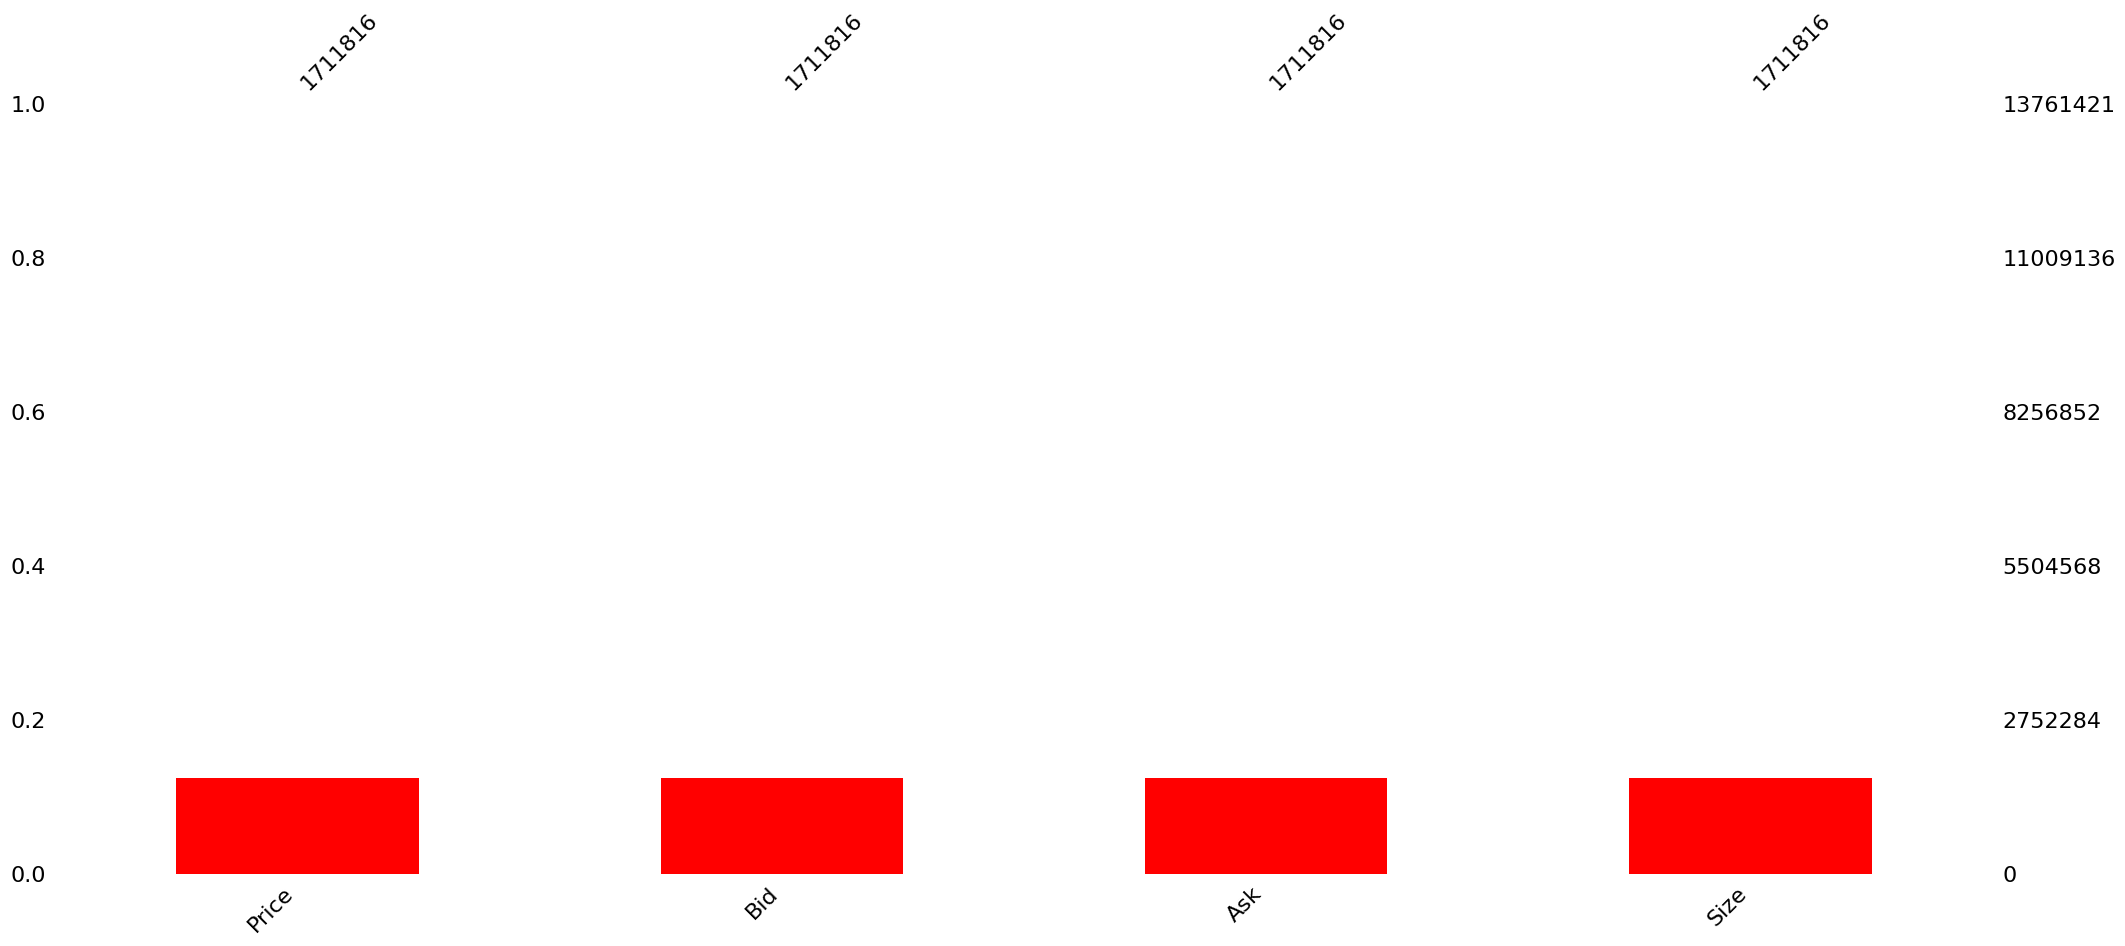

In [21]:
_ = msno.bar(df.resample("30S").mean(), color="red")